# TASK 2
## SPAM COMMENT CLASSIFICATION
In every task, I will show the step how to get the model and I will show the prediction step after that

### Step 1: Import Package

In [26]:
import pandas as pd, numpy as np
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize.casual import TweetTokenizer
import string
import re
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from keras.models import load_model
d = {}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Step 2: Import File for Training and Testing

In [2]:
data=pd.read_csv('Comment Spam.csv', encoding='ISO-8859-1', sep=';')
print(data)

        No                                            Comment  Class
0        1                                this song is racist      0
1        2  and how many subscribers compared to her over ...      1
2        3  HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...      1
3        4                                  well done shakira      0
4        5                 :D subscribe to me for daily vines      1
5        6  Part 2. Holy Mary, pray for us Holy Mother of ...      1
6        7   I really can&#39;t comprehend Miley Cyrus , s...      1
7        8                                      Nice song ^_^      0
8        9                   This makes me miss the world cup      0
9       10  ******* Facebook is LAME and so 2004! Check ou...      1
10      11  I hope everyone is in good spirits I&#39;m a h...      1
11      12                                                 :)      0
12      13                                        She is good      0
13      14  Subscribe to my Youtub

In [3]:
data_komen=data['Comment']
print(data_komen)

0                                     this song is racist
1       and how many subscribers compared to her over ...
2       HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...
3                                       well done shakira
4                      :D subscribe to me for daily vines
5       Part 2. Holy Mary, pray for us Holy Mother of ...
6        I really can&#39;t comprehend Miley Cyrus , s...
7                                           Nice song ^_^
8                        This makes me miss the world cup
9       ******* Facebook is LAME and so 2004! Check ou...
10      I hope everyone is in good spirits I&#39;m a h...
11                                                     :)
12                                            She is good
13      Subscribe to my Youtube Channel!! :) Suscribit...
14                                              beautiful
15      Earn money for being online with 0 efforts!   ...
16      **CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...
17      Hello 

### Step 3: Pre-processing

In [5]:
komen_bersih1=[]
link=r'https?://[A-Za-z0-9./-]+'
for komen in data_komen:
  komen=re.sub(link, "",komen)
  komen=re.sub("[0-9]", "", komen)
  komen_bersih1.append(komen)
print(komen_bersih1[1293])

 Like this  facebook-page! Chance to win an Iphone S!?


In [6]:
komen_word_tokenize=[]
for komen in komen_bersih1:
  komen=TweetTokenizer().tokenize(komen)
  komen_word_tokenize.append(komen)
print(komen_word_tokenize[1293])

['Like', 'this', 'facebook-page', '!', 'Chance', 'to', 'win', 'an', 'Iphone', 'S', '!', '?']


In [7]:
with open ('dictionary.txt') as text:
    for line in text:
        if line.strip():
            key, val = line.split(None, 1)
            d[key]=val.split()

def mencaritypo(kata):
    for key in d:
        list1=d.get(key)
        if kata in list1:
            return key
    return kata
  
def replacetypo(tupel):
    temp_data=[]
    for kalimat in tupel:
        temp_kalimat=[]
        for kata in kalimat:
            lit=kata.replace(kata, mencaritypo(kata))
            temp_kalimat.append(lit)
        temp_data.append(temp_kalimat)      
    return temp_data

komen_emot = replacetypo(komen_word_tokenize)
print(komen_emot[11])

['smile']


In [8]:
komen_only=[]
listtandabaca=set(['.',',','?','/',':',';','{','}','[',']','|','=','+','<','>','_','-','(',')','*','&','^','%','#','@','!'])
for komen in komen_emot:
  temp=[]
  for item in komen:
    if item not in listtandabaca:
      temp.append(item.lower())
  komen_only.append(temp)
print(komen_only[1293])

['like', 'this', 'facebook-page', 'chance', 'to', 'win', 'an', 'iphone', 's']


In [9]:
pip install glove_python

     |████████████████████████████████| 266kB 5.0MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700253 sha256=567ef12371b89cc157a05071ad4287febe89ab95976263ef698c4462478bdac7
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


### Step 4: Feature Extraction

In [10]:
#importing the glove library
from glove import Corpus, Glove
# creating a corpus object
corpus = Corpus() 
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus.fit(komen_only, window=5)
#creating a Glove object which will use the matrix created in the above lines to create embeddings
#We can set the learning rate as it uses Gradient Descent and number of components
glove = Glove(no_components=5, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove2.model')

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [0]:
glove.add_dictionary(corpus.dictionary)

In [12]:
print (glove.word_vectors[glove.dictionary['beautiful']])

[ 0.06768863  0.02605319 -0.1732963  -0.16988228  0.01360013]


In [0]:
import random
max_len=max(len(kata) for kata in komen_only)

def vectorize(dataset, maxlen):
  vectorized_komen=[]
  expected=[]
  for kalimat in dataset:
    sample_vecs=[]
    for kata in kalimat:
      try:
        sample_vecs.append(glove.word_vectors[glove.dictionary[kata]])
      except:
        sample_vecs.append(np.random.uniform(0.0,0.0,5))
    if len(sample_vecs)<maxlen:
      add=maxlen-len(sample_vecs)
      for _ in range(add):
        sample_vecs.append(np.random.uniform(0.0,0.0,5))
    sample_vecs=np.array(sample_vecs)
    vectorized_komen.append(sample_vecs)
  vectorized_komen=np.array(vectorized_komen)
  return vectorized_komen

In [14]:
max_len

208

In [0]:
vektor_komen=vectorize(komen_only,max_len)
vektor_komen[0]

array([[-0.90503159,  0.41961604,  1.23528979, -0.21269456,  1.07244588],
       [-0.51759033,  0.8241379 ,  0.67556987, -0.52630759,  0.52874512],
       [-0.71927016,  0.636317  ,  0.55377084, -0.4538883 ,  0.53426924],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

### Step 5: Splitting Data

In [0]:
#splitting data
split_point=int(len(data)*.8)
x_train = vektor_komen[:split_point]
y_train = data['Class'][:split_point]
x_test = vektor_komen[split_point:]
y_test = data['Class'][split_point:]

Y_train=pd.get_dummies(y_train).values
Y_test=pd.get_dummies(y_test).values

### Step 6: Build the Model

In [0]:
#Membangun model
model = Sequential()
embedding_dims=5
hidden_dims=10
model.add(Conv1D(filters=10,
                  strides=1,
                  kernel_size=5,
                  padding='valid',
                  activation='relu',
                  input_shape=(max_len, embedding_dims)))
model.add(MaxPooling1D())
model.add(Conv1D(filters=5,
                 strides=1,
                  kernel_size=5,
                  padding='valid',
                  activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(int(hidden_dims), activation='sigmoid'))
model.add(Dense(int(hidden_dims/2), activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
pat = 30 #this is the number of epochs with no improvment after which the training will stop
early_stopping = EarlyStopping(monitor='val_acc', patience=pat, verbose=1, mode='max')

#define the model checkpoint callback -> this will keep on saving the model as a physical file
model_checkpoint = ModelCheckpoint('best_model2',monitor='val_acc', verbose=1, save_best_only=True)

### Step 7: Training and Testing the Model

In [0]:
hasil=model.fit(x_train, Y_train,
         batch_size=5,
         epochs=500,
         verbose=2,
         callbacks=[early_stopping, model_checkpoint],
         validation_data=(x_test, Y_test))
hasil

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1040 samples, validate on 260 samples
Epoch 1/500
 - 2s - loss: 0.7041 - acc: 0.5423 - val_loss: 0.7364 - val_acc: 0.4192

Epoch 00001: val_acc improved from -inf to 0.41923, saving model to best_model2
Epoch 2/500
 - 0s - loss: 0.6746 - acc: 0.5462 - val_loss: 0.6823 - val_acc: 0.4192

Epoch 00002: val_acc did not improve from 0.41923
Epoch 3/500
 - 0s - loss: 0.6208 - acc: 0.6250 - val_loss: 0.6177 - val_acc: 0.7808

Epoch 00003: val_acc improved from 0.41923 to 0.78077, saving model to best_model2
Epoch 4/500
 - 0s - loss: 0.5529 - acc: 0.8173 - val_loss: 0.5563 - val_acc: 0.8308

Epoch 00004: val_acc improved from 0.78077 to 0.83077, saving model to best_model2
Epoch 5/500
 - 0s - loss: 0.5051 - acc: 0.8462 - val_loss: 0.5055 - val_acc: 0.8423

Epoch 00005: val_acc improved from 0.83077 to 0.84231, saving model to best_model2
Epoch 6/500
 - 0s - loss: 0.4563 - acc: 0.8548 - val_lo

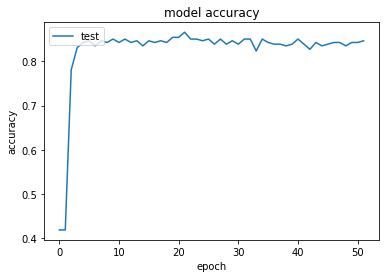

In [0]:
plt.plot(hasil.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

## Classifier
In this part, I will make the classifier for user who want to classify their comment

In [0]:
input_comment=('Please input your comment here')

In [29]:
listtandabaca=set(['.',',','?','/',':',';','{','}','[',']','|','=','+','<','>','_','-','(',')','*','&','^','%','#','@','!'])
link=r'https?://[A-Za-z0-9./-]+'
input_data=re.sub(link,"",input_comment)
input_data=re.sub('[0-9]',"",input_data)
input_data=TweetTokenizer().tokenize(input_data)
with open ('dictionary.txt') as text:
    for line in text:
        if line.strip():
            key, val = line.split(None, 1)
            d[key]=val.split()
input_fix=[]
input_fix.append(input_data)
input_fix=replacetypo(input_fix)
input_only=[]
for komen in input_fix:
  temp=[]
  for item in komen:
    if item not in listtandabaca:
      temp.append(item.lower())
  input_only.append(temp)
vector_comment=vectorize(input_only,max_len)
best_model=load_model('best_model2_86%')
output=best_model.predict_classes(vector_comment)
output=str(output)
if output==('[0]'):
  print('This comment is not a spam')
elif output==('[1]'):
  print('Watchout, THIS IS A SPAM!!!')
else:
  print('ERROR')

This comment is not a spam
